In [1]:
# # # MOUNTING DRIVE # # #
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# # # DEPENDANCIES # # #
import os
import pandas as pd
import pandas as pd
import numpy as np
import re 

# # # VISUALIZATION DEPENDANCIES # # #
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from wordcloud import WordCloud, STOPWORDS

# # # NLP DEPENDANCIES # # # 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string

import calendar 
import datetime

%matplotlib inline
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
df_original.columns

Index(['pk', 'link', 'id', 'title', 'description', 'category', 'count', 'date',
       'likes', 'dislikes', 'duration'],
      dtype='object')

In [0]:
# # # Emoji Pattern # # #
EMOJI_PATTERN = re.compile(
  "(["
  "\U0001F1E0-\U0001F1FF"  # flags (iOS)
  "\U0001F300-\U0001F5FF"  # symbols & pictographs
  "\U0001F600-\U0001F64F"  # emoticons
  "\U0001F680-\U0001F6FF"  # transport & map symbols
  "\U0001F700-\U0001F77F"  # alchemical symbols
  "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
  "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
  "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
  "\U0001FA00-\U0001FA6F"  # Chess Symbols
  "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
  "\U00002702-\U000027B0"  # Dingbats
  "])"
)

#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#Emoticons Union
emoticons = emoticons_happy.union(emoticons_sad)

stop_words = set(stopwords.words('english'))

In [0]:
# # # Function finds whether URL is present or not # # #
def Find(string): 
  # findall() has been used  
  # with valid conditions for urls in string 
  regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
  url = re.findall(regex,string)       
  return [x[0] for x in url] 

def fnCleanLines(lines):
  newclean = ''
  cleaned = list()
  # prepare a translation table to remove punctuation
  table = str.maketrans('', '', string.punctuation)
  #removing mentions
  lines = re.sub(r':', '', lines)
  lines = re.sub(r'‚Ä¶', '', lines)
  #remove emojis from tweet
  lines = EMOJI_PATTERN.sub(r'', lines)
  # Removes hyper links
  text = re.sub(r'http\S+', '', lines)
  # tokenize on white space
  text = text.split()
  # convert to lower case
  text = [word.lower() for word in text]
  # remove punctuation from each token
  text = [w.translate(table) for w in text]
  #word_tokens = word_tokenize(text)
  filtered_tweet = []
  for w in text:
    if w not in stop_words and w not in emoticons and w not in string.punctuation:
      filtered_tweet.append(w)
  return ' '.join(filtered_tweet)

In [0]:
# # # VARIABLES # # #
fpath = '/content/gdrive/My Drive/AIML/DIY_Programs/YouTube_Analysis/'
filename = 'dfYoutubeMaster.csv'
lblFont = {
        'color':  'white',
        'weight': 'normal',
        }

In [0]:
df_original = pd.read_csv(fpath + filename)
df= pd.read_csv(fpath + filename)

In [0]:
df_original.head(5)

,pk,link,id,title,description,category,count,date,likes,dislikes,duration
0,1,https://www.youtube.com/watch?v=YRhxdVk_sIs,YRhxdVk_sI,Convolutional Neural Networks (CNNs) explained,CNNs for deep learning. Blog for this vid! \n#...,ConvNets,"442,175 views",9-Dec-17,11K,187,8:36
1,2,https://www.youtube.com/watch?v=umGJ30-15_A,GJ30-15_A,Convolutional Neural Network (CNN) | Convoluti...,The code referenced in this video is from http...,ConvNets,"208,865 views",25-Sep-17,3.5K,146,22:13
2,3,https://www.youtube.com/watch?v=FmpDIaiMIeA,FmpDIaiMIeA,How Convolutional Neural Networks work,Part of the End-to-End Machine Learning School...,ConvNets,"727,893 views",18-Aug-16,13K,138,26:13:00
3,4,https://www.youtube.com/watch?v=K_BHmztRTpA,K_BHmztRTpA,What is a convolutional neural network (CNN)?,A convolutional neural network is a type of ne...,ConvNets,"20,223 views",25-Sep-18,397,8,6:01
4,5,https://www.youtube.com/watch?v=5VuEkubgDiw,5VuEkubgDi,NaN,"In this week's Whiteboard Wednesdays video, th...",ConvNets,"32,481 views",22-Mar-17,371,50,8:48


In [0]:
df['likes_original'] = df['likes']
df['likes_K'] = [1000 if ((x != 'LIKE') and ('K' in x)) else 1 for x in df['likes'].astype(str)] # 
# df['likes_K'] = [1000000 if (('M' in x)) else 1 for x in df['likes'].astype(str)] # 
df['likes_new'] = [x.replace('K','').replace('M','') if x != 'LIKE' else x for x in df['likes'].astype(str)] # ((x != 'LIKE') and ('k' in x)) else x
# df['likes_new'] = [x.replace('M','') if x != 'LIKE' else x for x in df['likes_new']]
df['likes_new'] = [1 if 'LIKE' == x else x for x in df['likes_new']]
df['likes'] = df['likes_K'] * df['likes_new'].astype(float)


df['dislikes_K'] = [1000 if ((x != 'DISLIKE') and ('k' in x)) else 1 for x in df['dislikes'].astype(str)] # 'K' in x
df['dislikes_new'] = [x.replace('K','') if x != 'DISLIKE' else x for x in df['dislikes']] # ((x != 'DISLIKE') and ('k' in x)) else x
df['dislikes_new'] = [1 if 'DISLIKE' == x else x for x in df['dislikes_new']]
df['dislikes'] = df['dislikes_K'] * df['dislikes_new'].astype(float)

# # # Checks whether the video is live streamed using the txt in date # # #
df['Live Streamed'] = 'False'
df.loc[df['date'].str.contains('Streamed'),['Live Streamed']] = 'True'
df.loc[df['date'].str.contains('Streaming'),['Live Streamed']] = 'True'

# # # Checks whether the video is premiered using the txt in date # # #
df['Premiered'] = 'False'
df.loc[df['date'].str.contains('Premiered'),['Premiered']] = 'True'

# # # Date processing # # #
df['Date_New'] = df['date']
df['Date_New'] = ['05-Jun-17' if 'hours ago' in x else x for x in df['Date_New']]
df['Date_New'] = ['05-Jun-17' if 'minutes' in x else x for x in df['Date_New']]
df['Date_New'] = [x[21:23]+'-'+x[17:20]+'-'+x[len(x)-4:len(x)] if 'Streamed live on' in x else x for x in df['Date_New']]
df['Date_New'] = [x[14:16]+'-'+x[10:13]+'-'+x[len(x)-4:len(x)] if 'Premiered' in x else x for x in df['Date_New']]
df['Date_New'] = [x[25:27]+'-'+x[21:24]+'-'+x[len(x)-4:len(x)] if 'Started streaming on' in x else x for x in df['Date_New']]
df['Date_New'] = [x[18:20]+'-'+x[14:17]+'-'+x[len(x)-4:len(x)] if 'Scheduled for ' in x else x for x in df['Date_New']]
df['Date_New'] = [x[0:7] +'20'+x[-2:] if ('-' in x[-3] and len(x) == 9) else x for x in df['Date_New']]
df['Date_New'] = [x[0:6] +'20'+x[-2:] if ('-' in x[-3] and len(x) == 8) else x for x in df['Date_New']]
df['day'] = [x[0:2] if len(x) == 11 else x[0] for x in df['Date_New']]
df['day']= [x[0] if ',' in x else x for x in df['day']]
df['month'] = [x[3:6] if len(x) == 11 else x[2:5] for x in df['Date_New']]
df['month'] = [datetime.datetime.strptime(x, '%b').month for x in df['month']]
df['year'] = [x[len(x)-4:len(x)] for x in df['Date_New']]
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df['day'] = [calendar.day_name[x.weekday()] for x in df['date']]
df['AgeInDays'] = (datetime.datetime(2020, 6, 1, 18, 25, 30) - df['date']).dt.days

df['count'] = [x.replace(',','').replace('watching now','').replace('views','').replace('view','').replace('waiting','').strip() for x in df['count'].astype(str)]
df.loc[df['count'] == 'No', ['count']] = 0
df.loc[df["count"] =='nan',['count']] = 0
df['count'].astype(float)

df['duration_new'] = df['duration']
df.loc[df['duration_new'].isna() == True, ['duration_new']] = "00:00:00"
df['hrs'] = [int(x[0:x.find(':')]) if len(x) > 6 else 0 for x in df['duration_new']]
df['mins'] = [int(x[x.find(':')+1:x.rfind(':')]) if len(x) > 6 else int(x[0:x.find(':')]) for x in df['duration_new']]
df.loc[df['hrs']>=24, ['mins']] = df['hrs']
df.loc[df['hrs']>=24, ['hrs']] = 0
df['totalMins'] = (df['hrs']*60) + df['mins']
bins = [0, 10, 30, 60, 1440]
labels =['<10 mins','>10 mins and <30 mins','>30 mins and <60 mins','>60 mins']
df['binnedDuration'] = pd.cut(df['totalMins'], bins,labels=labels,include_lowest = True)

df['lenTitle'] = df['title'].str.len()
df.loc[df['lenTitle'].isna() == True, ['lenTitle']] = 0

df['lenDescription'] = df['description'].str.len()
df.loc[df['lenDescription'].isna() == True, ['lenDescription']] = 0
df.loc[df['description'].isna() == True,['description']] = 'NA'
df['UrlInDescriptionCount'] = 0
df['UrlInDescriptionCount'] = [len(Find(x)) for x in df['description']]
df['EmojiInDescriptionCount'] = 0
df['EmojiInDescriptionCount'] = [len(re.findall(EMOJI_PATTERN,x)) for x in df['description']]


df['lenTitle'] = df['title'].str.len()
df.loc[df['lenTitle'].isna() == True, ['lenTitle']] = 0
df.loc[df['title'].isna() == True,['title']] = 'NA'
df['EmojiInTitleCount'] = 0
df['EmojiInTitleCount'] = [len(re.findall(EMOJI_PATTERN,x)) for x in df['title']]

df['likestoViews'] = round((df['likes'].astype(float)/(df['count'].astype(float)+ 1e-6))*100,2)

df.loc[df['category'] == 'RecurrentNeuralNetwork',['category']] = 'Recurrent Neural Network'

# df.loc[df['pk'] == 2509,['count']] = 16
# df.loc[df['pk'] == 2509,['likes']] = 5

# # # Changing datatype # # #

df["count"] = pd.to_numeric(df["count"])
df["totalMins"] = pd.to_numeric(df["totalMins"])

df['description_new'] = [fnCleanLines(x) for x in df['description']]
df['title_new'] = [fnCleanLines(x) for x in df['title']]

# Computing Sentiment Intensity
sid = SentimentIntensityAnalyzer()

# Description Sentiment Intensity 
df['descriptionScores'] = df['description_new'].apply(lambda review: sid.polarity_scores(review))
df['descriptionCompound']  = df['descriptionScores'].apply(lambda score_dict: score_dict['compound'])
df['descriptionType'] = df['descriptionCompound'].apply(lambda c: 'Positive Report' if c >0.1 else ('Neutral Story' if c <=0.1 and c > -0.1  else 'Negative Report'))

# Description Sentiment Intensity 
df['titleScores'] = df['title_new'].apply(lambda review: sid.polarity_scores(review))
df['titleCompound']  = df['titleScores'].apply(lambda score_dict: score_dict['compound'])
df['titleType'] = df['titleCompound'].apply(lambda c: 'Positive Report' if c >0.1 else ('Neutral Story' if c <=0.1 and c > -0.1  else 'Negative Report'))

# df = df.drop(['likes_K', 
#               'dislikes_K', 
#               'likes_new', 
#               'dislikes_new', 
#               'Date_New',
#               'duration',
#               'duration_new',
#               'hrs',
#               'mins'], axis=1)

In [0]:
# # # Questionable Links # # # 
df.loc[(df['likes'] >df['count']),['likes', 'count', 'UrlInDescriptionCount','link','pk',]]

,likes,count,UrlInDescriptionCount,link,pk
595,2.0,1,0,https://www.youtube.com/watch?v=aK2NeoZULYA,596
657,3700.0,0,5,https://www.youtube.com/watch?v=MwtVkPKx3RA,658
1188,62000.0,617,9,https://www.youtube.com/watch?v=5qky3L2Q6G4,1189
1477,9.0,4,1,https://www.youtube.com/watch?v=gN1nQT-lA_k,1478
1496,2.0,1,0,https://www.youtube.com/watch?v=2TBlvfd6-7s,1497
2991,4.0,3,0,https://www.youtube.com/watch?v=Hw3SIAYlI5w,2992
3020,1.0,0,0,https://www.youtube.com/watch?v=BmnzsoZdX7s,3021
3604,3700.0,1,5,https://www.youtube.com/watch?v=MwtVkPKx3RA,3605


In [0]:
df = df.loc[df['UrlInDescriptionCount']!=5,]
df = df.loc[(df['likes']<=df['count']),]

In [0]:
df[['pk','likes', 'count', 'link']].sample(5)

,pk,likes,count,link
147,148,194.0,7813,https://www.youtube.com/watch?v=Y2Tna77k1aI
2750,2751,46.0,2078,https://www.youtube.com/watch?v=ToFZO1XgHE8
3530,3531,7.0,488,https://www.youtube.com/watch?v=6dMXJqijntY
2771,2772,10000.0,797292,https://www.youtube.com/watch?v=QfNvhPx5Px8
419,420,0.0,83,https://www.youtube.com/watch?v=msRpRUSBcSU


In [0]:
df_original.loc[df_original['pk']==2180,['pk','likes', 'count', 'link']]

,pk,likes,count,link
2179,2180,180,"3,569 views",https://www.youtube.com/watch?v=Z8zCUKbDYr0


In [0]:
df.columns

Index(['pk', 'link', 'id', 'title', 'description', 'category', 'count', 'date',
       'likes', 'dislikes', 'duration', 'likes_original', 'likes_K',
       'likes_new', 'dislikes_K', 'dislikes_new', 'Live Streamed', 'Premiered',
       'Date_New', 'day', 'month', 'year', 'AgeInDays', 'duration_new', 'hrs',
       'mins', 'totalMins', 'binnedDuration', 'lenTitle', 'lenDescription',
       'UrlInDescriptionCount', 'EmojiInDescriptionCount', 'EmojiInTitleCount',
       'likestoViews', 'description_new', 'title_new', 'descriptionScores',
       'descriptionCompound', 'descriptionType', 'titleScores',
       'titleCompound', 'titleType'],
      dtype='object')

#### Word Cloud

In [0]:
comment_words = ' '
stopwords = set(STOPWORDS) 

for val in df.description: 
   
  # typecaste each val to string 
  val = str(val) 

  # split the value 
  tokens = val.split() 

  # Converts each token into lowercase 
  for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 

  for words in tokens: 
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
# plot the WordCloud image                        
plt.figure(figsize = (12,7), facecolor = (0, 0, 0)) 
# plt.title("YOUTUBE DESCRIPTION WORD CLOUD", y=1.02, color= '#39ff14', fontweight="bold")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
# ax = plt.gca()
# ax.set_facecolor((0, 0, 0))
plt.show() 

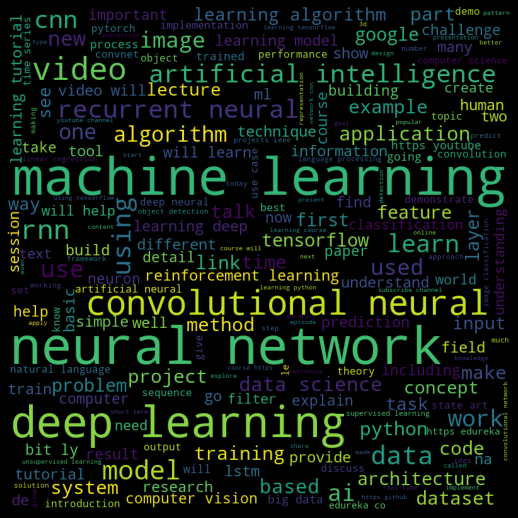

In [0]:
plt.figure(figsize = (7,15), facecolor = (0, 0, 0)) 
# plt.title("YOUTUBE DESCRIPTION WORD CLOUD", y=1.02, color= '#39ff14', fontweight="bold")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
# ax = plt.gca()
# ax.set_facecolor((0, 0, 0))
plt.show() 

#### Count Plots

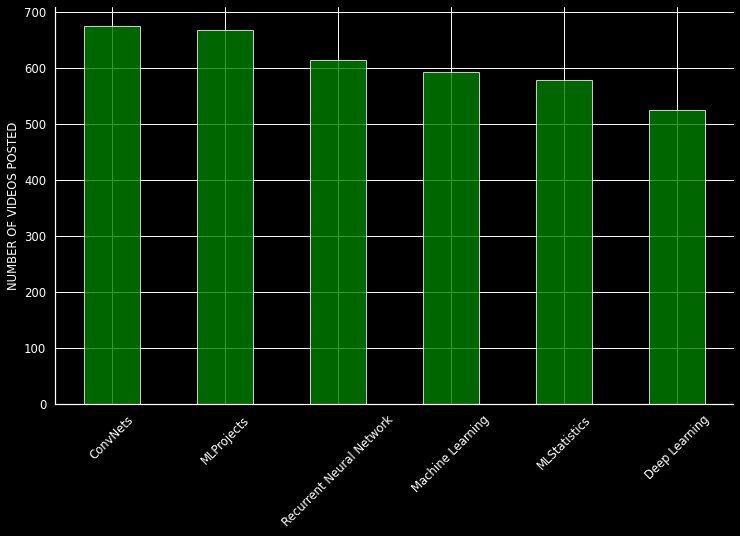

In [9]:
# # # Catergory Count # # #

plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70) 
sns.set(rc={'axes.facecolor':'black', 
            'figure.facecolor':'black', 
            'axes.spines.top': False

            })
ax = df['category'].value_counts().plot(kind='bar', color = 'green', alpha = 0.8)
ax.set_xlabel('')
ax.set_ylabel('NUMBER OF VIDEOS POSTED')
ax.set()
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
sns.despine()
plt.xticks(rotation=45)
plt.show()

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

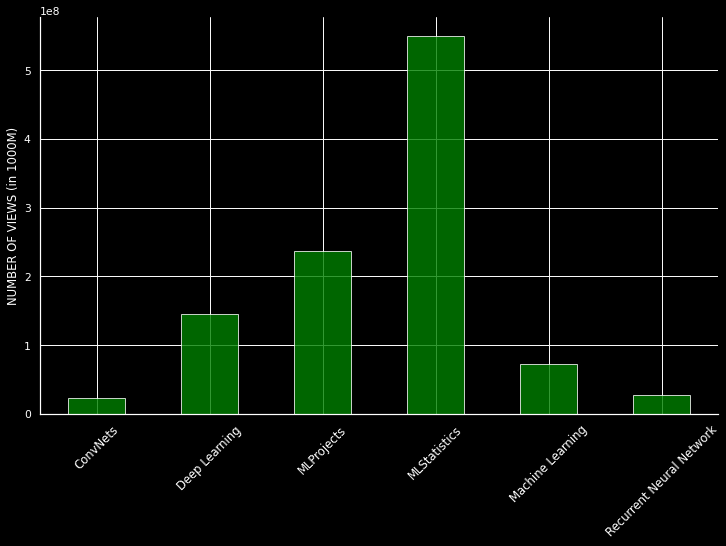

In [0]:
# # # Number of views category wise # # #
plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70) 
ax = df.groupby('category')['count'].agg('sum').plot(kind='bar',alpha = .8, color='green')
ax.set_xlabel('')
ax.set_ylabel('NUMBER OF VIEWS (in 1000M)')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
sns.despine()
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

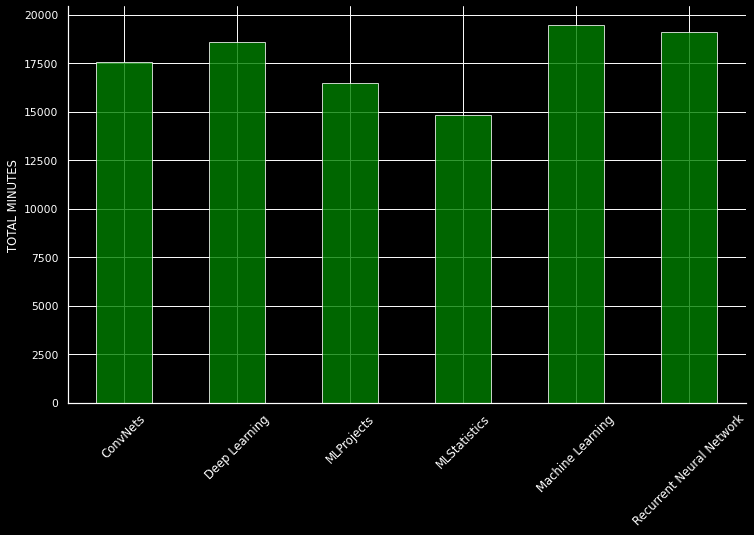

In [11]:
# # # Number of views category wise # # #
plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70) 
ax = df.groupby('category')['totalMins'].agg('sum').plot(kind='bar',alpha = .8, color='green')
ax.set_xlabel('')
ax.set_ylabel('TOTAL MINUTES')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
sns.despine()
plt.xticks(rotation=45)

In [0]:
# # # # LIKES TO VIEW % Length of Video in binned category# # #

# # temp = df[['binnedDuration','likes','count']]
# def divide_two_cols(df_sub):
#     return (df_sub['totalMins'].sum() / float(df_sub['category'].count()))

# plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70) 
# ax = df.groupby('category').apply(divide_two_cols).plot(kind='bar',alpha = .8, color='green')
# ax.set_xlabel('')
# ax.set_ylabel('LIKES TO VIEW (%)')
# ax.xaxis.label.set_color('white')
# ax.yaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='white',labelsize=12)
# ax.tick_params(axis='y', colors='white')
# sns.despine()
# plt.xticks(rotation=45)

In [0]:
df.groupby('category')[['count']].agg('sum')

,count
category,
ConvNets,23261211
Deep Learning,144961782
MLProjects,236766359
MLStatistics,549310803
Machine Learning,72324509
Recurrent Neural Network,27503290


In [0]:
df['binnedDuration'].unique()

[<10 mins, >10 mins and <30 mins, >30 mins and <60 mins, >60 mins]
Categories (4, object): [<10 mins < >10 mins and <30 mins < >30 mins and <60 mins < >60 mins]

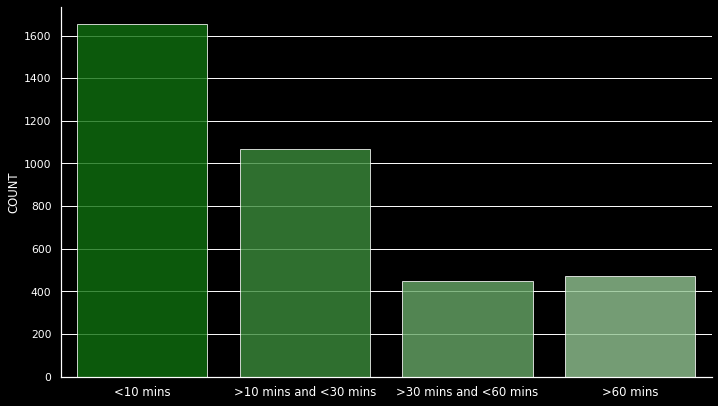

In [0]:
# # # No Of Videos in each length category # # #
plt.figure(figsize = (12,7), facecolor = 'black', dpi=70) 
sns.set(rc={'axes.facecolor':'black', 
            'figure.facecolor':'black', 
            'axes.spines.top': False

            })

ax = sns.countplot(x='binnedDuration',  data=df, alpha=0.8,palette=sns.light_palette("green",reverse=True))
ax.set_xlabel('')
ax.set_ylabel('COUNT')
ax.set()
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
# leg = ax.legend();
# ax.tick_params(labelsize=5)
sns.despine()
plt.show()

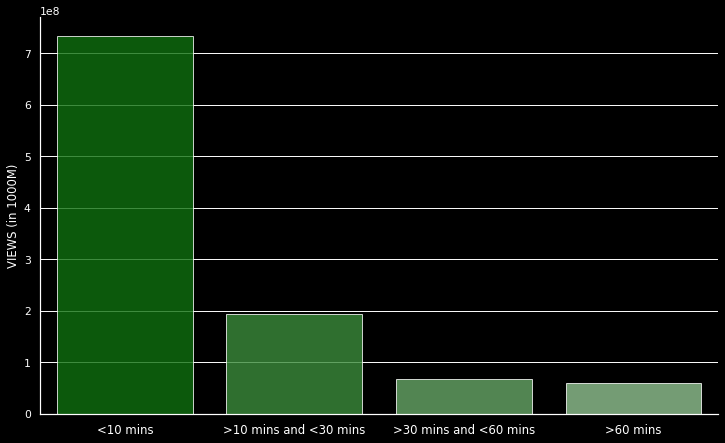

In [0]:
# # # No of VIEWS in each binnded category # # # 

plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70) 
sns.set(rc={'axes.facecolor':'black', 
            'figure.facecolor':'black', 
            'axes.spines.top': False

            })
ax = sns.barplot(x='binnedDuration',y='count', estimator=sum, data = df, ci=None, alpha = 0.8, palette=sns.light_palette("green",reverse=True))
ax.set_xlabel('')
ax.set_ylabel('VIEWS (in 1000M)')
ax.set()
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
# leg = ax.legend();
# ax.tick_params(labelsize=5)
sns.despine()
plt.show()

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

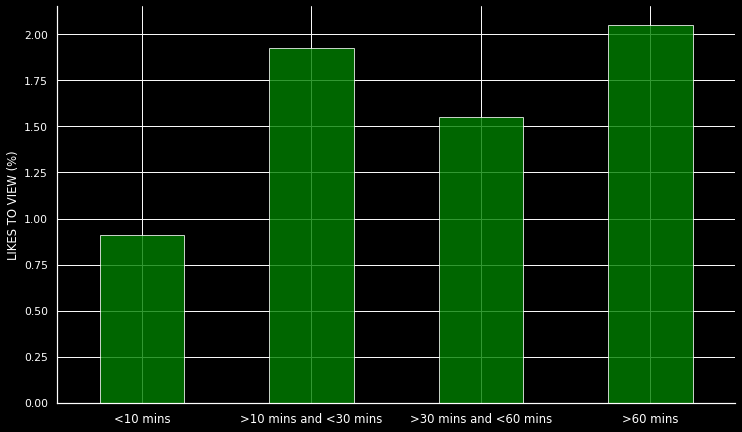

In [0]:
# # # LIKES TO VIEW % Length of Video in binned category# # #

# temp = df[['binnedDuration','likes','count']]
def divide_two_cols(df_sub):
    return (df_sub['likes'].sum() / float(df_sub['count'].sum()))*100

plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70) 
ax = df.groupby('binnedDuration').apply(divide_two_cols).plot(kind='bar',alpha = .8, color='green')
ax.set_xlabel('')
ax.set_ylabel('LIKES TO VIEW (%)')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
sns.despine()
plt.xticks(rotation=360)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

<Figure size 875x525 with 0 Axes>

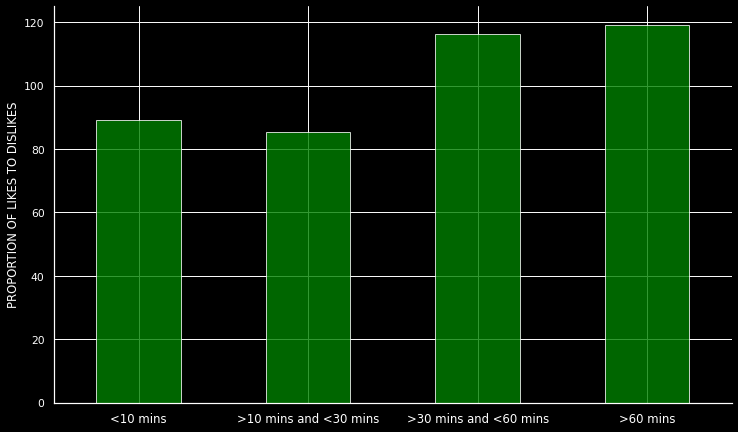

In [12]:
# # # LIKES TO DISLIKES # # # 
plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70)
def divide_two_cols(df_sub):
    return (df_sub['likes'].sum() / float(df_sub['dislikes'].sum()))

plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70) 
ax = df.groupby('binnedDuration').apply(divide_two_cols).plot(kind='bar',alpha = .8, color='green')
ax.set_xlabel('')
ax.set_ylabel('PROPORTION OF LIKES TO DISLIKES')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
sns.despine()
plt.xticks(rotation=360)

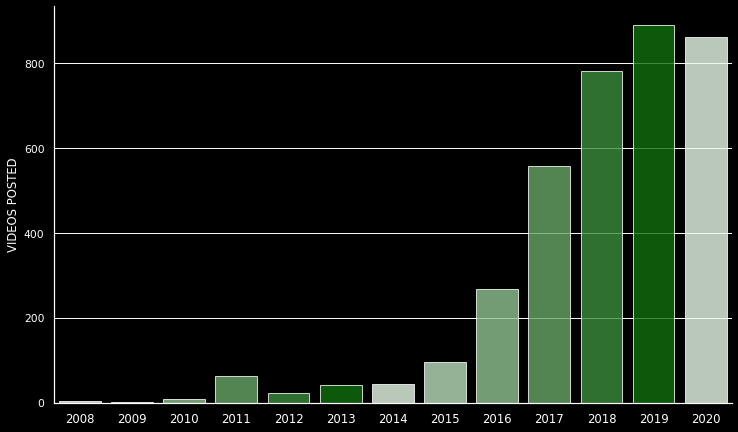

In [0]:
# # # VIDEOS POSTED Year Wise # # #

plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70) 
sns.set(rc={'axes.facecolor':'black', 
            'figure.facecolor':'black', 
            'axes.spines.top': False

            })
ax = sns.barplot(x='year',y='year,data = df, estimator=len, ci=None, palette=sns.light_palette("green",reverse=False), alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('VIDEOS POSTED')
ax.set()
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
# leg = ax.legend();
# ax.tick_params(labelsize=5)
sns.despine()
plt.show()

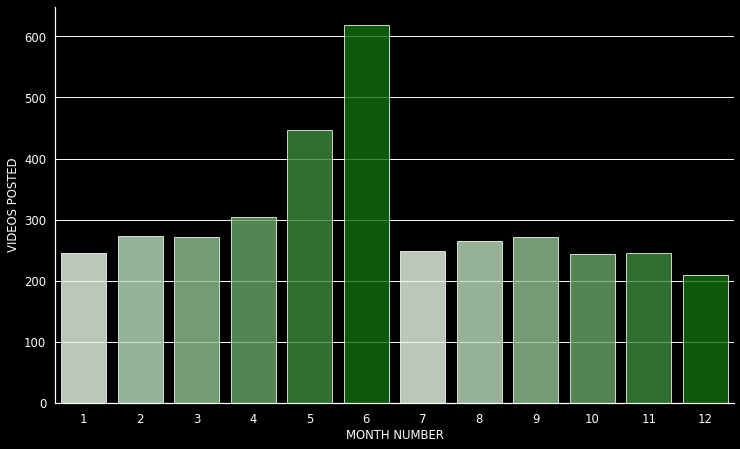

In [0]:
# # # VIDOS POSTED Month Wise # # #
plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70) 
sns.set(rc={'axes.facecolor':'black', 
            'figure.facecolor':'black', 
            'axes.spines.top': False

            })
ax = sns.barplot(x='month',y='month',data = df, estimator=len, ci=None, palette=sns.light_palette("green",reverse=False), alpha=0.8)
ax.set_xlabel('MONTH NUMBER')
ax.set_ylabel('VIDEOS POSTED')
ax.set()
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
# leg = ax.legend();
# ax.tick_params(labelsize=5)
sns.despine()
plt.show()

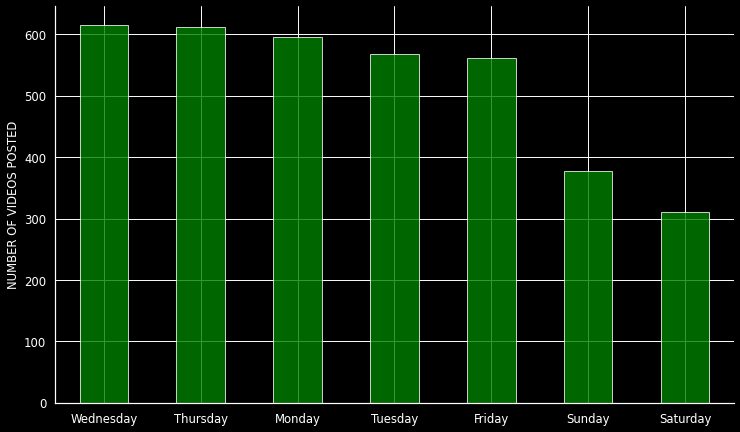

In [0]:
# # # VIDEOS POSTED Day Wise # # #

plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70) 
sns.set(rc={'axes.facecolor':'black', 
            'figure.facecolor':'black', 
            'axes.spines.top': False

            })
ax = df['day'].value_counts().plot(kind='bar', color = 'green', alpha = 0.8)
ax.set_xlabel('')
ax.set_ylabel('NUMBER OF VIDEOS POSTED')
ax.set()
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
sns.despine()
plt.xticks(rotation=360)
plt.show()

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

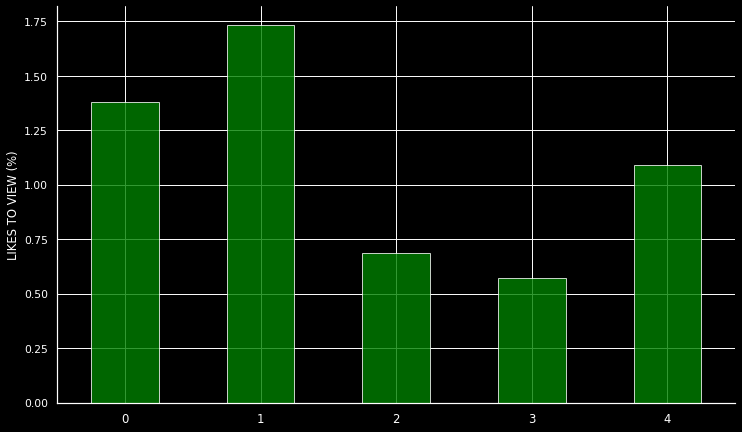

In [0]:
# # # LIKES TO VIEW % URL DESCRIPTION # # # 
def divide_two_cols(df_sub):
    return (df_sub['likes'].sum() / float(df_sub['count'].sum()))*100

plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70) 
ax = df.groupby('UrlInDescriptionCount').apply(divide_two_cols).plot(kind='bar',alpha = .8, color='green')
ax.set_xlabel('')
ax.set_ylabel('LIKES TO VIEW (%)')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
sns.despine()
plt.xticks(rotation=360)

In [0]:
df.loc[df['UrlInDescriptionCount']==9,['UrlInDescriptionCount','count','likes','link']]

,UrlInDescriptionCount,count,likes,link
1188,9,617,62.0,https://www.youtube.com/watch?v=5qky3L2Q6G4


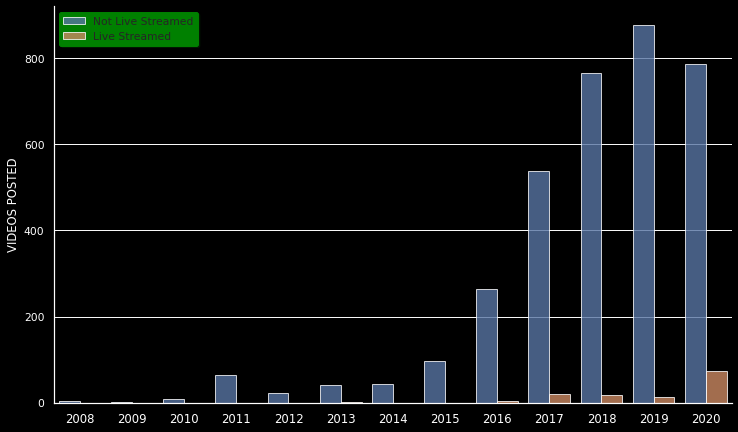

In [0]:
# # # Year wise comparison Live Steam Vs No Live Stream # # #

plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70) 
sns.set(rc={'axes.facecolor':'black', 
            'figure.facecolor':'black', 
            'axes.spines.top': False

            })

label = ['Not Live Streamed', 'Live Streamed']
ax = sns.barplot(x='year',y='year',hue='Live Streamed',data = df, estimator=len, ci=None, alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('VIDEOS POSTED')
ax.set()
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
# leg = ax.legend();
# ax.tick_params(labelsize=5)
h, l = ax.get_legend_handles_labels()
legend = ax.legend(loc='upper left', shadow=True,handles=h, labels=label) # , fontsize='x-large'
legend.get_frame().set_color('green')
sns.despine()
plt.show()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

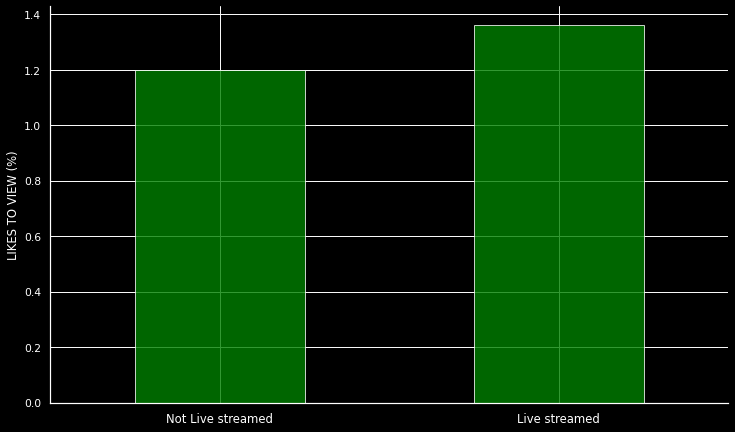

In [0]:
# temp = df[['binnedDuration','likes','count']]
def divide_two_cols(df_sub):
    return (df_sub['likes'].sum() / float(df_sub['count'].sum()))*100

plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70) 
ax = df.groupby('Live Streamed').apply(divide_two_cols).plot(kind='bar',alpha = .8, color='green')
ax.set_xlabel('')
ax.set_ylabel('LIKES TO VIEW (%)')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
locs, labels = plt.xticks()
plt.xticks(locs,labels=['Not Live streamed', 'Live streamed'])
sns.despine()
plt.xticks(rotation=360)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

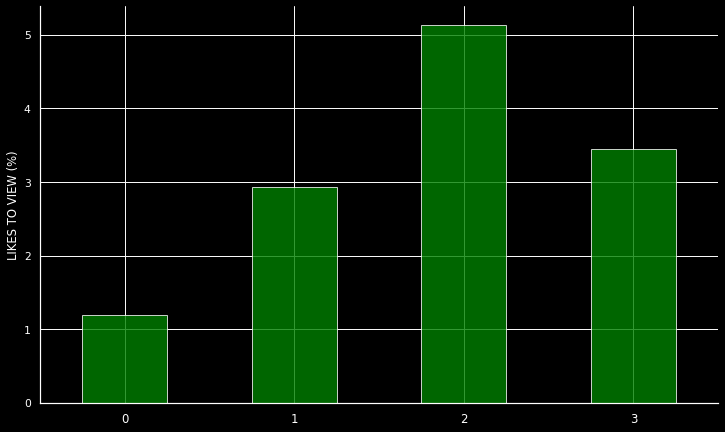

In [14]:
# temp = df[['binnedDuration','likes','count']]
def divide_two_cols(df_sub):
    return (df_sub['likes'].sum() / float(df_sub['count'].sum()))*100

plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70) 
ax = df.groupby('EmojiInTitleCount').apply(divide_two_cols).plot(kind='bar',alpha = .8, color='green')
ax.set_xlabel('')
ax.set_ylabel('LIKES TO VIEW (%)')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
sns.despine()
plt.xticks(rotation=360)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

<Figure size 875x525 with 0 Axes>

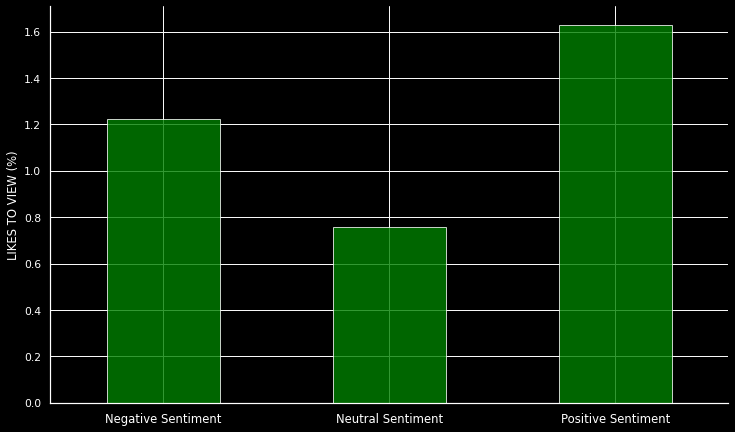

In [0]:
# # # LIKES TO VIEW % Description Sentiment # # # 
plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70)
def divide_two_cols(df_sub):
    return (df_sub['likes'].sum() / float(df_sub['count'].sum()))*100

plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70) 
ax = df.groupby('descriptionType').apply(divide_two_cols).plot(kind='bar',alpha = .8, color='green')
ax.set_xlabel('')
ax.set_ylabel('LIKES TO VIEW (%)')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
sns.despine()
locs, labels = plt.xticks()
plt.xticks(locs,labels=['Negative Sentiment', 'Neutral Sentiment','Positive Sentiment'])
plt.xticks(rotation=360)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

<Figure size 875x525 with 0 Axes>

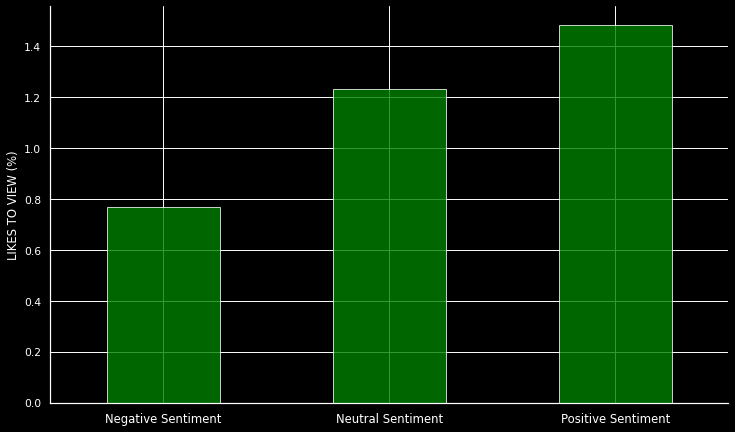

In [0]:
# # # LIKES TO VIEW % Title Sentiment # # # 
plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70)
def divide_two_cols(df_sub):
    return (df_sub['likes'].sum() / float(df_sub['count'].sum()))*100

plt.figure(figsize = (12.5,7.5), facecolor = 'black', dpi=70) 
ax = df.groupby('titleType').apply(divide_two_cols).plot(kind='bar',alpha = .8, color='green')
ax.set_xlabel('')
ax.set_ylabel('LIKES TO VIEW (%)')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
sns.despine()
locs, labels = plt.xticks()
plt.xticks(locs,labels=['Negative Sentiment', 'Neutral Sentiment','Positive Sentiment'])
plt.xticks(rotation=360)

#### Other

In [0]:
df.sample(1)

,pk,link,id,title,description,category,count,date,likes,dislikes,duration,likes_original,likes_K,likes_new,dislikes_K,dislikes_new,Live Streamed,Premiered,Date_New,day,month,year,AgeInDays,duration_new,hrs,mins,totalMins,binnedDuration,lenTitle,lenDescription,UrlInDescriptionCount,EmojiInDescriptionCount,EmojiInTitleCount,likestoViews,description_new,title_new,descriptionScores,descriptionCompound,descriptionType,titleScores,titleCompound,titleType
188,189,https://www.youtube.com/watch?v=6jfw8MuKwpI,6jfw8MuKwpI,NA,Take the Deep Learning Specialization: http://...,ConvNets,48755,2017-11-07,408.0,2.0,4:51,408,1,408,1,2,False,False,7-Nov-2017,Tuesday,11,2017,937,4:51,0,4,4,<10 mins,0.0,199.0,3,0,0,0.84,take deep learning specialization check course...,na,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral Story,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral Story


In [0]:
df.groupby('UrlInDescriptionCount').apply(divide_two_cols)

UrlInDescriptionCount
0         1.870823
1         2.337881
2         2.428832
3         4.778899
4         4.017279
5    144000.000000
dtype: float64

In [0]:
# df.loc[(df['likes'] >df['count']) & (df['UrlInDescriptionCount'] == 5),['likes', 'count', 'UrlInDescriptionCount','link']]
df.loc[(df['likes'] >df['count']),['likes', 'count', 'UrlInDescriptionCount','link','pk',]]

,likes,count,UrlInDescriptionCount,link,pk


In [0]:
df_original.loc[df_original['pk']==1888,]

,pk,link,id,title,description,category,count,date,likes,dislikes,duration
1887,1888,https://www.youtube.com/watch?v=gzJAqx8RHsk,gzJAqx8RHsk,NaN,"In this video, We’ll try making a simple & min...",CNN,22 views,31-May-20,LIKE,DISLIKE,5:51


In [0]:
g = sns.catplot(x="class", hue="who", col="survived",
                data=titanic, kind="count",
                height=4, aspect=.7);

count    2577.000000
mean       32.906480
std        61.515603
min         0.000000
25%         5.000000
50%        13.000000
75%        39.000000
max       702.000000
Name: totalMins, dtype: float64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

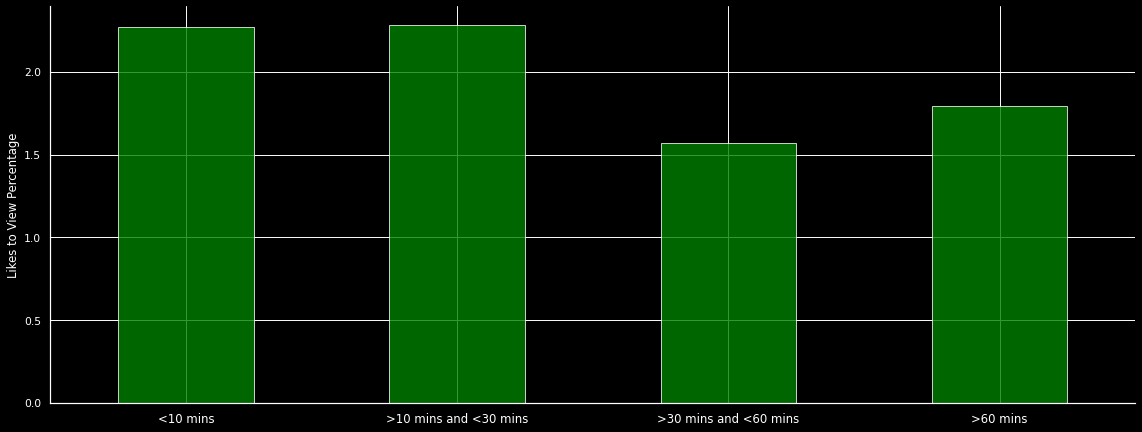

In [0]:
# # # Likes to View Percentage

# temp = df[['binnedDuration','likes','count']]
def divide_two_cols(df_sub):
    return (df_sub['likes'].sum() / float(df_sub['count'].sum()))*100

plt.figure(figsize = (20,7.5), facecolor = 'black', dpi=70) 
ax = df.groupby('binnedDuration').apply(divide_two_cols).plot(kind = 'bar',alpha = .8, color = 'green')
ax.set_xlabel('')
ax.set_ylabel('Likes to View Percentage')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
sns.despine()
plt.xticks(rotation=360)

In [0]:
(df.loc[df['binnedDuration']=='<10 mins',['likes']].sum()[0]/df.loc[df['binnedDuration']=='<10 mins',['count']].sum()[0])*100

2.2726159826856005

In [0]:
# plt.figure(figsize = (20,7.5), facecolor = 'black', dpi=70) 
# sns.set(rc={'axes.facecolor':'black', 
#             'figure.facecolor':'black', 
#             'axes.spines.top': False,
#             'xtick.color': 'white',
#             'ytick.color': 'white',
#             'axes.labelcolor': 'white',
#             })
# sns.set_style({'legend.frameon':True})
# ax = sns.relplot(x='totalMins', y='count', size='count',sizes=(20,150),data = df, height=6, aspect = 2, color='blue')
# ax.set_axis_labels(x_var="Video Length (mins)", y_var="Number of views")
# ax._legend.set_frame_on(True)
# ax._legend.set_in_layout(False)
# ax._legend.set_title('Count Size')
# # check axes and find which is have legend
# # leg = ax.legend()
# # ax.tick_params(labelsize=5)
# sns.despine()
# # plt.legend()
# plt.show()

In [0]:
df.loc[df['binnedDuration'] == '>60 mins',['likes']].sum() / df.loc[df['binnedDuration'] == '>60 mins',['likes']].count()

likes    2915.125874
dtype: float64

In [0]:
sns.axes_style(
)

In [0]:
ax._legend.properties()